In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from google.colab import drive

drive.mount('/content/drive')
train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/f-069-2025-2-hw-2/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/f-069-2025-2-hw-2/test.csv")




Mounted at /content/drive


In [4]:
train_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,03/12/2017,76,4,3.5,73,1.0,1060,-0.8,0.00,0.0,0.0,Winter,No Holiday,Yes
1,24/02/2018,259,10,0.8,60,2.9,497,-6.0,0.71,0.0,0.0,Winter,No Holiday,Yes
2,10/04/2018,1023,12,20.5,37,4.6,1761,5.2,2.94,0.0,0.0,Spring,No Holiday,Yes
3,20/06/2018,1184,13,26.2,51,3.2,1078,15.2,3.36,0.0,0.0,Summer,No Holiday,Yes
4,24/05/2018,922,11,21.5,30,2.9,1779,3.1,2.92,0.0,0.0,Spring,No Holiday,Yes


In [5]:
train_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000
mean,704.492009,11.483733,12.944563,58.498145,1.721932,1434.862300,4.201983,0.565157,0.147146,0.074900
std,646.319069,6.919630,11.916427,20.356912,1.037089,610.901872,13.040137,0.864318,1.096730,0.429426
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-29.800000,0.000000,0.000000,0.000000
25%,189.000000,5.000000,3.500000,43.000000,0.900000,929.750000,-4.500000,0.000000,0.000000,0.000000
50%,505.000000,11.000000,13.800000,57.000000,1.500000,1699.000000,5.300000,0.010000,0.000000,0.000000
75%,1063.000000,18.000000,22.600000,74.000000,2.300000,2000.000000,14.900000,0.920000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,29.500000,8.800000


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7008 entries, 0 to 7007
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       7008 non-null   object 
 1   Rented Bike Count          7008 non-null   int64  
 2   Hour                       7008 non-null   int64  
 3   Temperature(°C)            7008 non-null   float64
 4   Humidity(%)                7008 non-null   int64  
 5   Wind speed (m/s)           7008 non-null   float64
 6   Visibility (10m)           7008 non-null   int64  
 7   Dew point temperature(°C)  7008 non-null   float64
 8   Solar Radiation (MJ/m2)    7008 non-null   float64
 9   Rainfall(mm)               7008 non-null   float64
 10  Snowfall (cm)              7008 non-null   float64
 11  Seasons                    7008 non-null   object 
 12  Holiday                    7008 non-null   object 
 13  Functioning Day            7008 non-null   objec

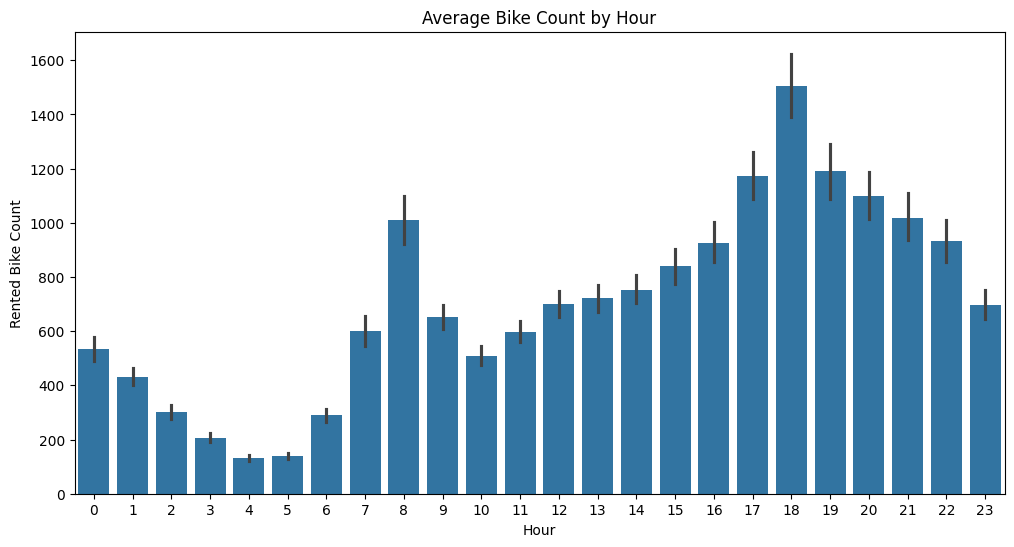

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=train_df, x='Hour', y='Rented Bike Count')
plt.title('Average Bike Count by Hour')
plt.show()

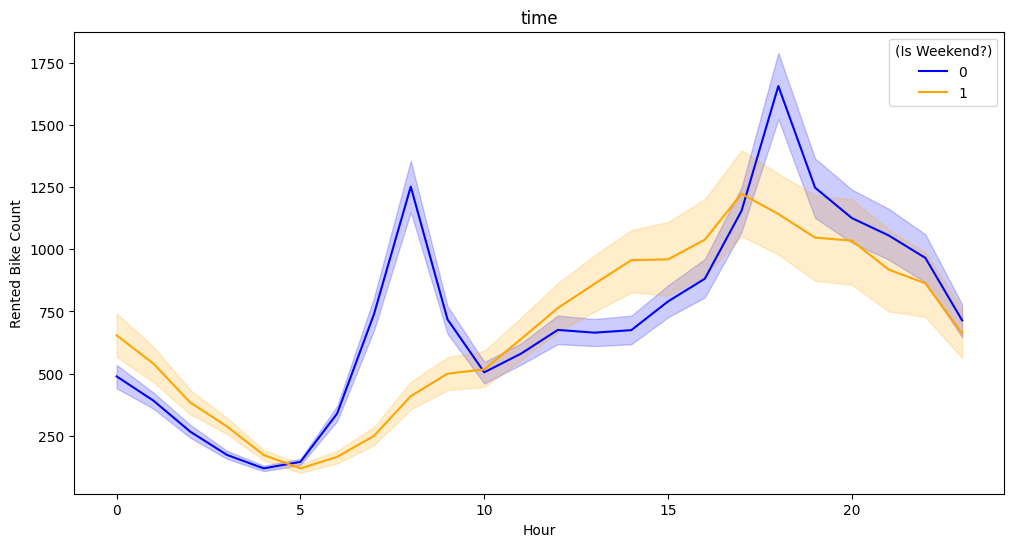

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


# --- 1. 시각화 분석용으로 원본 데이터 다시 로드 ---
analysis_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/f-069-2025-2-hw-2/train.csv")

def process_dates(df):
    df_copy = df.copy()
    df_copy['Date'] = pd.to_datetime(df_copy['Date'], format='%d/%m/%Y')
    df_copy['Year'] = df_copy['Date'].dt.year
    df_copy['Month'] = df_copy['Date'].dt.month
    df_copy['Day'] = df_copy['Date'].dt.day
    df_copy['DayOfWeek'] = df_copy['Date'].dt.dayofweek
    return df_copy

analysis_df = process_dates(analysis_df)
analysis_df['is_weekend'] = analysis_df['DayOfWeek'].apply(lambda x: 1 if (x >= 5) else 0)

plt.figure(figsize=(12, 6))
sns.lineplot(data=analysis_df, x='Hour', y='Rented Bike Count', hue='is_weekend', palette=['blue', 'orange'])
plt.title('time')
plt.legend(title='(Is Weekend?)')
plt.show()

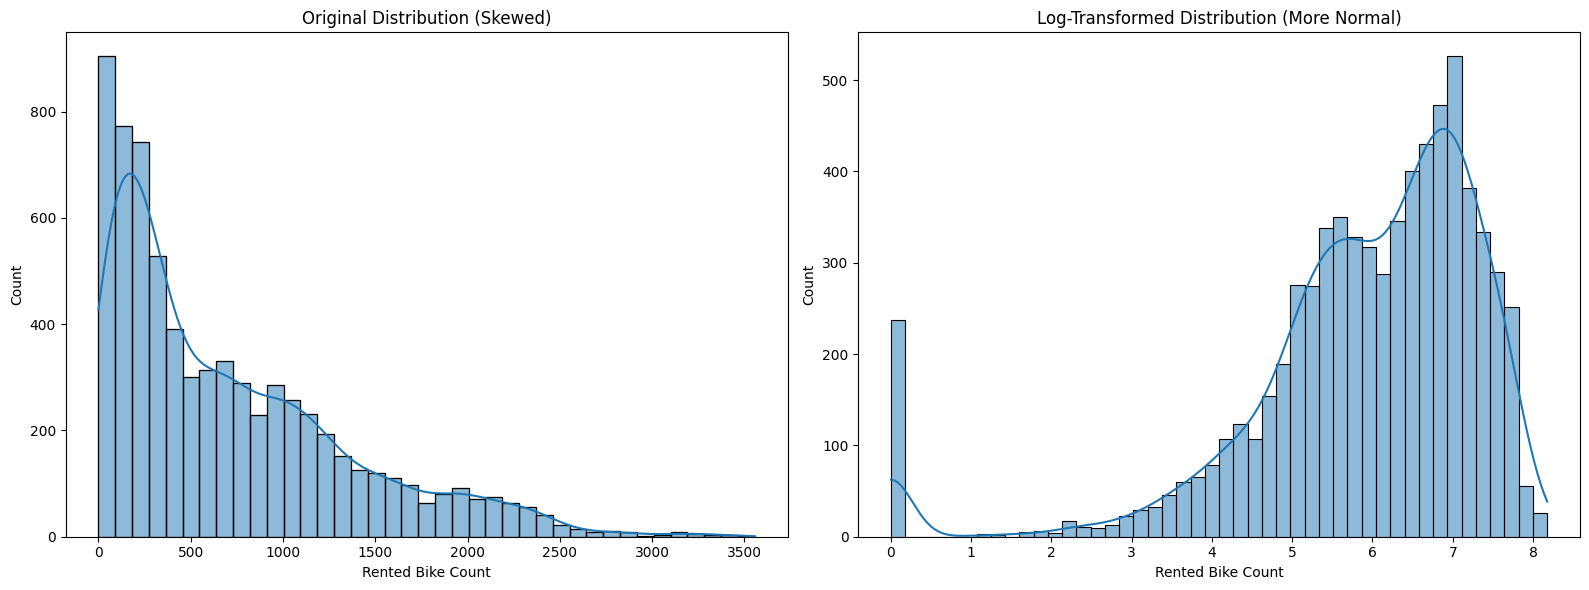

In [12]:

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
# 왼쪽 그래프: 원본 데이터의 분포
sns.histplot(train_df['Rented Bike Count'], kde=True, ax=axes[0])
axes[0].set_title('Original Distribution (Skewed)')

log_transformed_count = np.log1p(train_df['Rented Bike Count'])
sns.histplot(log_transformed_count, kde=True, ax=axes[1])
axes[1].set_title('Log-Transformed Distribution (More Normal)')
plt.tight_layout()
plt.show()

Mounted at /content/drive


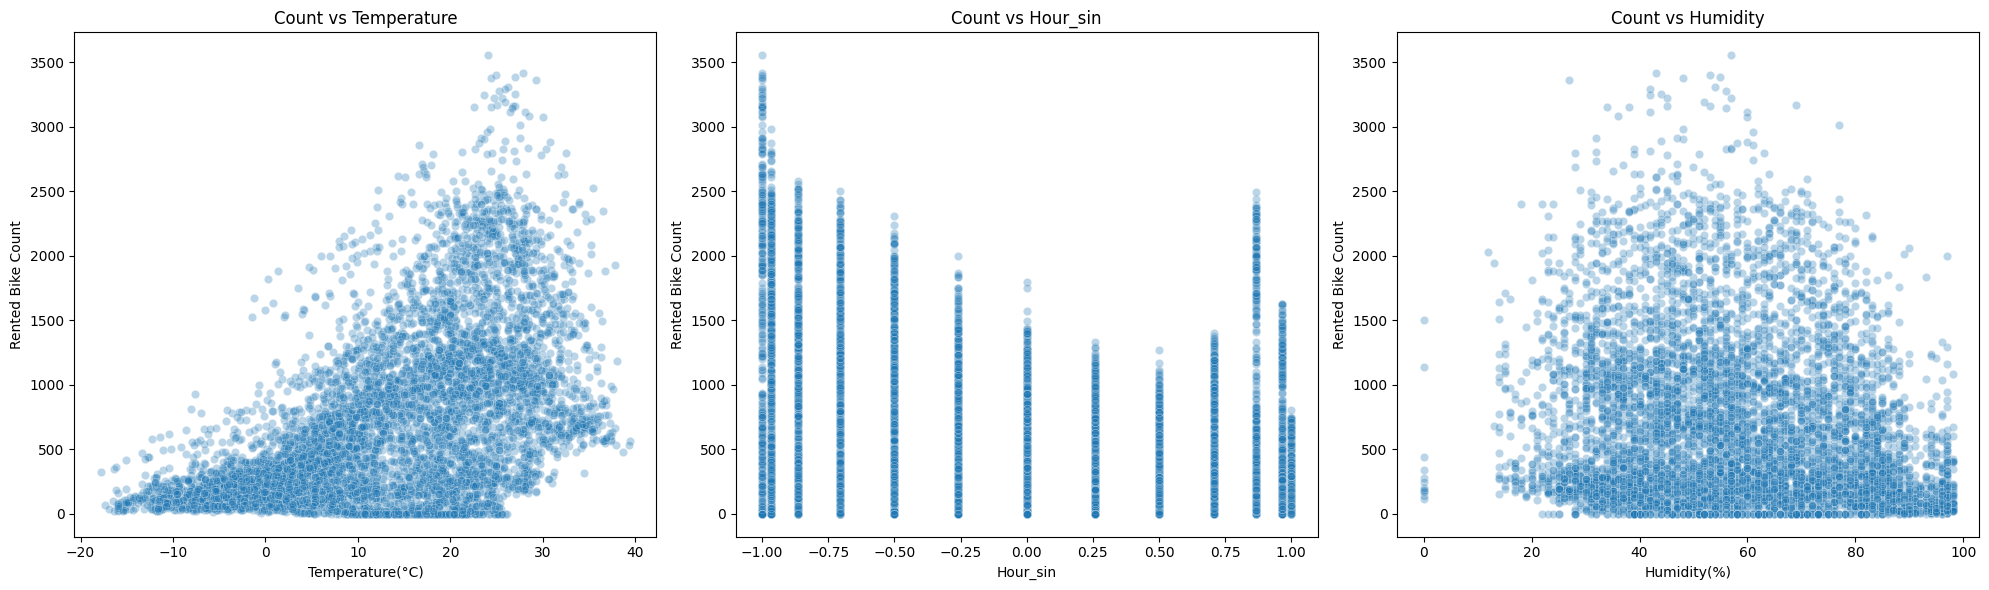

In [21]:
import pandas as pd
from google.colab import drive
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

drive.mount('/content/drive', force_remount=True)
train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/f-069-2025-2-hw-2/train.csv")

def process_dates(df):
    df_copy = df.copy()
    df_copy['Date'] = pd.to_datetime(df_copy['Date'], format='%d/%m/%Y')
    df_copy['Year'] = df_copy['Date'].dt.year
    df_copy['Month'] = df_copy['Date'].dt.month
    df_copy['Day'] = df_copy['Date'].dt.day
    df_copy['DayOfWeek'] = df_copy['Date'].dt.dayofweek
    df_copy = df_copy.drop('Date', axis=1)
    return df_copy

def process_cyclical(df):
    df_copy = df.copy()
    df_copy['Month_sin'] = np.sin(2 * np.pi * df_copy['Month'] / 12)
    df_copy['Month_cos'] = np.cos(2 * np.pi * df_copy['Month'] / 12)
    df_copy['DayOfWeek_sin'] = np.sin(2 * np.pi * df_copy['DayOfWeek'] / 7)
    df_copy['DayOfWeek_cos'] = np.cos(2 * np.pi * df_copy['DayOfWeek'] / 7)
    df_copy['Hour_sin'] = np.sin(2 * np.pi * df_copy['Hour'] / 24)
    df_copy['Hour_cos'] = np.cos(2 * np.pi * df_copy['Hour'] / 24)
    df_copy = df_copy.drop(['Month', 'DayOfWeek', 'Hour'], axis=1)
    return df_copy

f_df = train_df.copy()
f_df = process_dates(f_df)
f_df = process_cyclical(f_df)
f_df['Rented Bike Count'] = train_df['Rented Bike Count']

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.scatterplot(x=f_df['Temperature(°C)'], y=f_df['Rented Bike Count'], ax=axes[0], alpha=0.3)
axes[0].set_title('Count vs Temperature')

sns.scatterplot(x=f_df['Hour_sin'], y=f_df['Rented Bike Count'], ax=axes[1], alpha=0.3)
axes[1].set_title('Count vs Hour_sin')

sns.scatterplot(x=f_df['Humidity(%)'], y=f_df['Rented Bike Count'], ax=axes[2], alpha=0.3)
axes[2].set_title('Count vs Humidity')

plt.tight_layout()
plt.show()

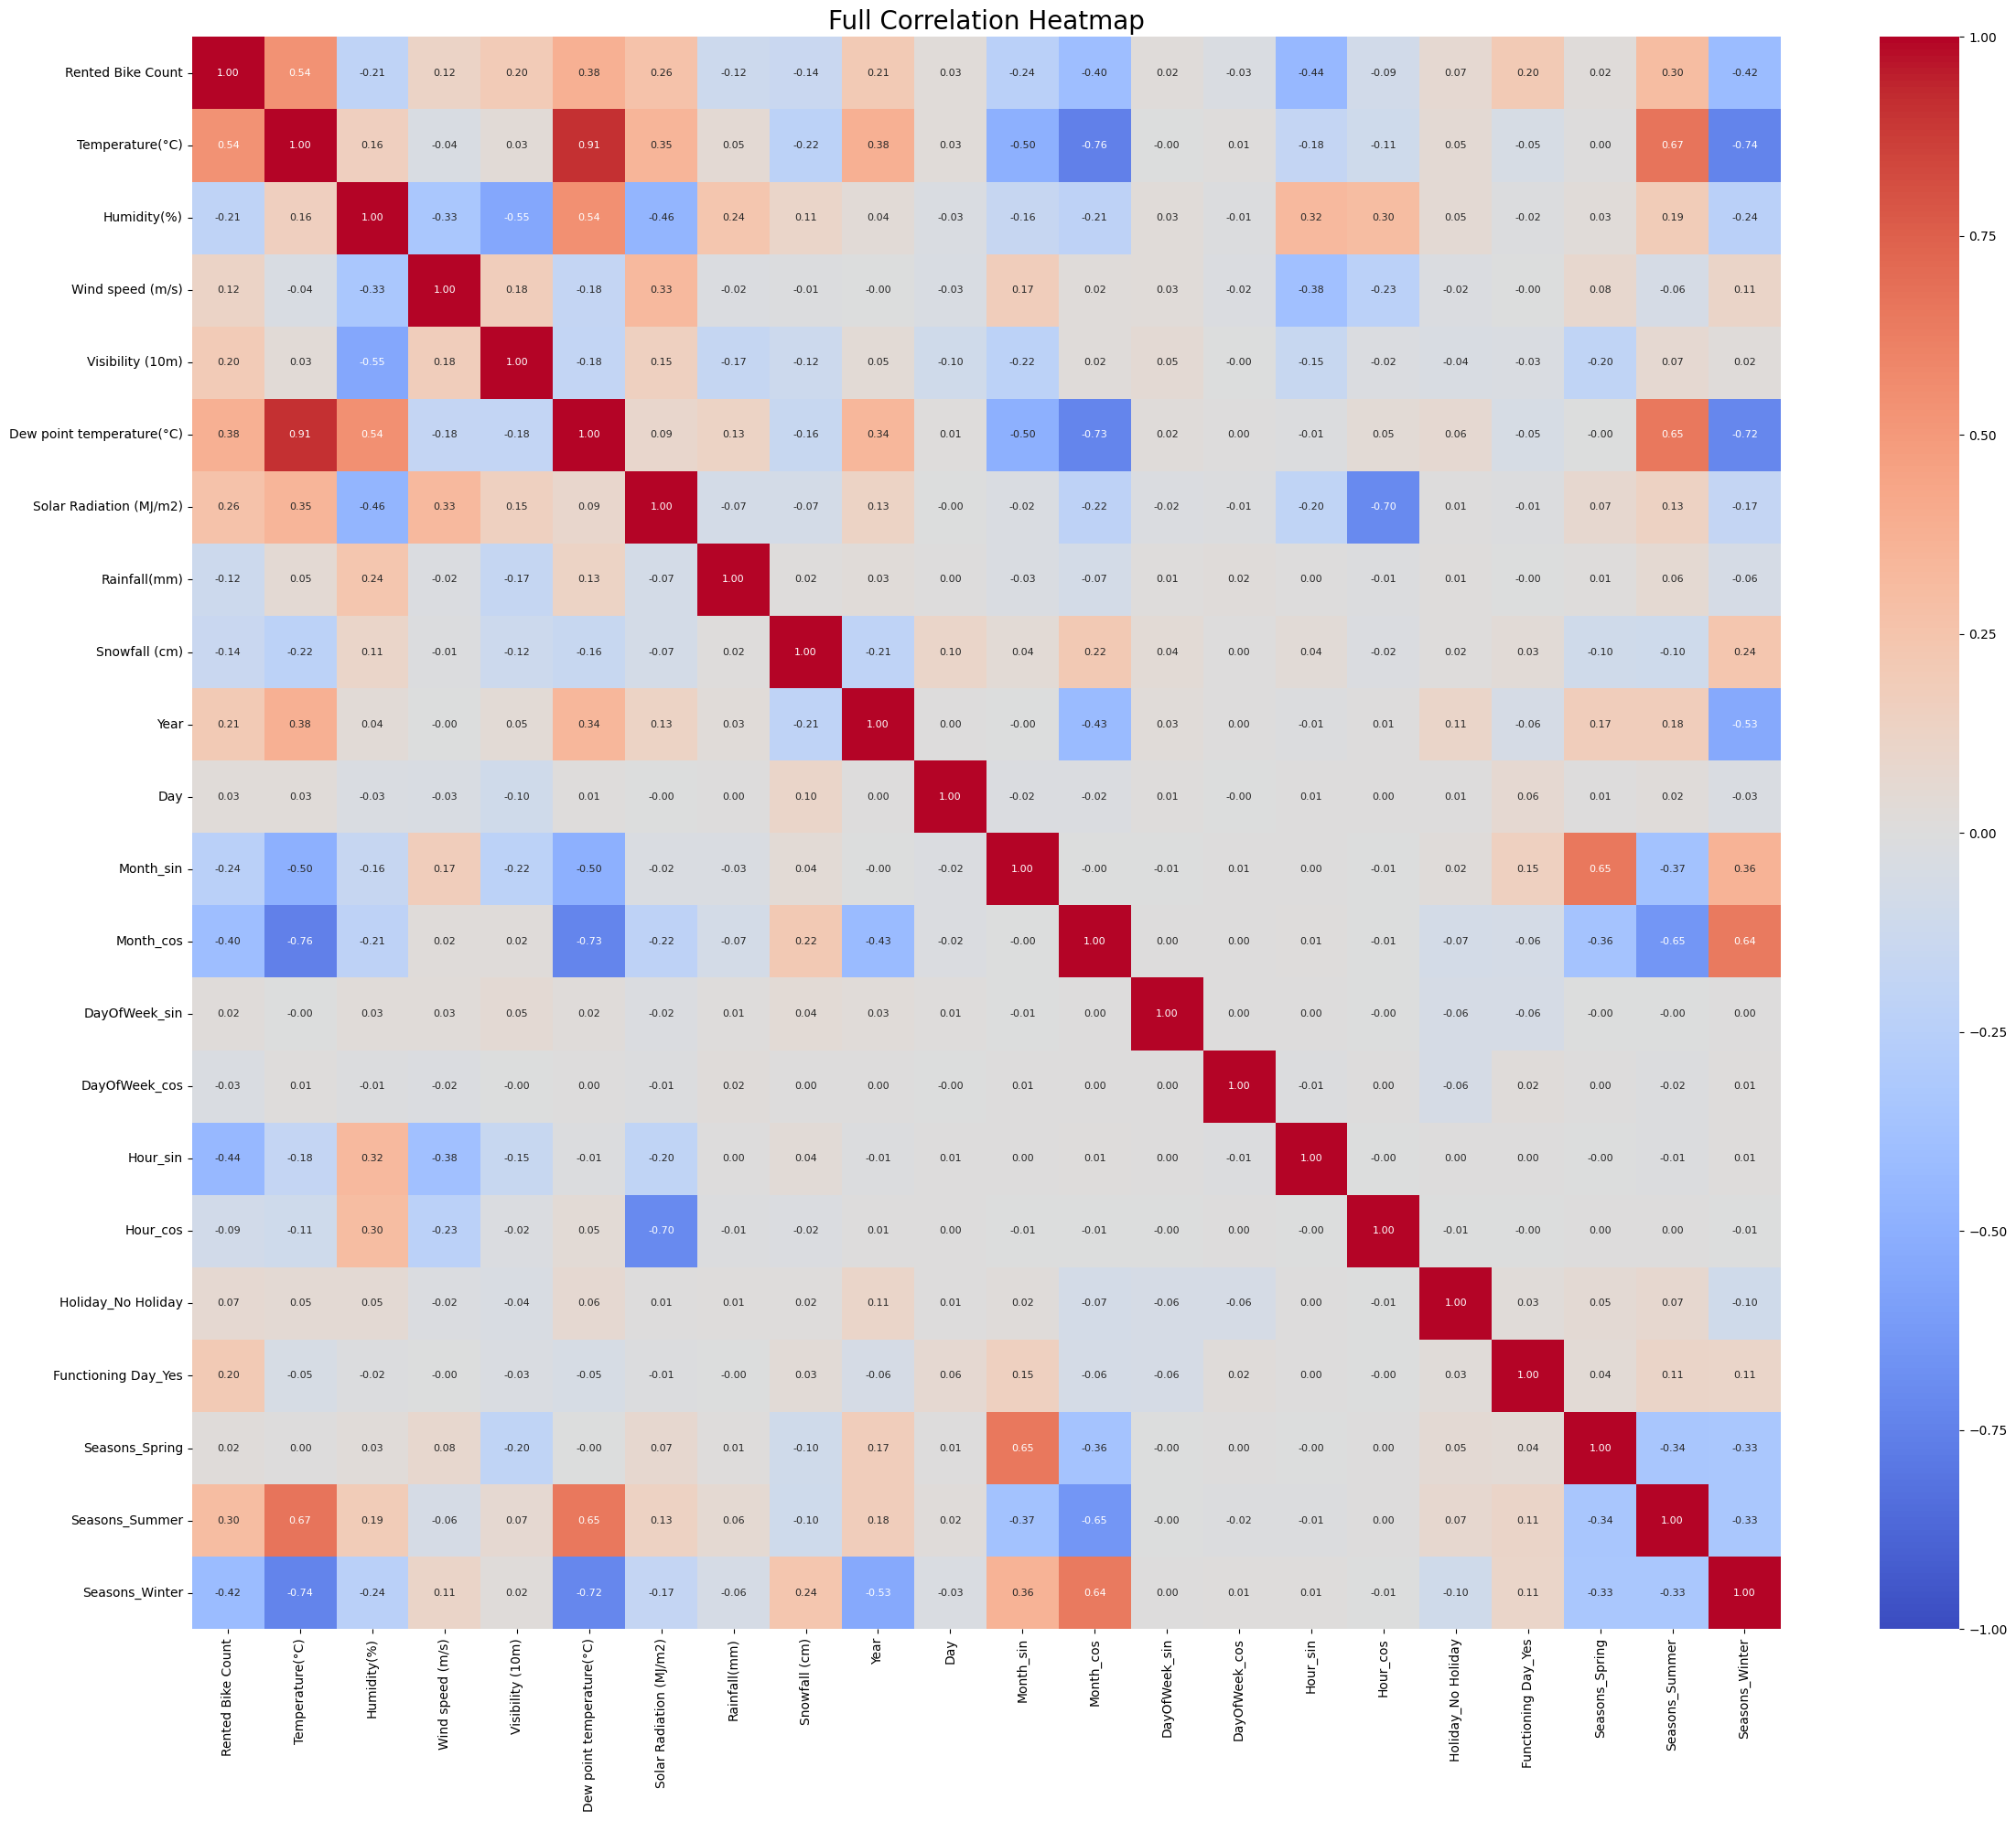

In [22]:
y_train_original = train_df['Rented Bike Count'].values
temp_heatmap_df = train_df.copy()
temp_heatmap_df = process_dates(temp_heatmap_df)
temp_heatmap_df = process_cyclical(temp_heatmap_df)

categorical_features = ['Holiday', 'Functioning Day', 'Seasons']
temp_heatmap_df = pd.get_dummies(temp_heatmap_df, columns=categorical_features, drop_first=True)

temp_heatmap_df = temp_heatmap_df.fillna(0)
temp_heatmap_df['Rented Bike Count'] = y_train_original
corr_matrix = temp_heatmap_df.corr()

plt.figure(figsize=(24, 20))
sns.heatmap(corr_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            vmin=-1, vmax=1,
            annot_kws={"size": 8})
plt.title('Full Correlation Heatmap', fontsize=20)
plt.tight_layout()
plt.show()

In [11]:
import pandas as pd
import numpy as np


analysis_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/f-069-2025-2-hw-2/train.csv")
analysis_df['Date'] = pd.to_datetime(analysis_df['Date'], format='%d/%m/%Y')
analysis_df['DateHour'] = analysis_df['Date'] + pd.to_timedelta(analysis_df['Hour'], unit='h')
analysis_df = analysis_df.sort_values(by='DateHour').reset_index(drop=True)

analysis_df['Temp_lag_1h'] = analysis_df['Temperature(°C)'].shift(1)
analysis_df['Rain_lag_1h'] = analysis_df['Rainfall(mm)'].shift(1)
analysis_df['Snow_lag_1h'] = analysis_df['Snowfall (cm)'].shift(1)
analysis_df['Humid_lag_1h'] = analysis_df['Humidity(%)'].shift(1)

correlation_check = analysis_df[[
    'Rented Bike Count',
    'Temperature(°C)', 'Temp_lag_1h',
    'Rainfall(mm)', 'Rain_lag_1h',
    'Snowfall (cm)', 'Snow_lag_1h',
    'Humidity(%)', 'Humid_lag_1h'
]].corr()

print("===== 'Rented Bike Count'와의 상관관계 비교 =====")
print(correlation_check['Rented Bike Count'].sort_values(ascending=False))

===== 'Rented Bike Count'와의 상관관계 비교 =====
Rented Bike Count    1.000000
Temp_lag_1h          0.544867
Temperature(°C)      0.536243
Rain_lag_1h         -0.115444
Rainfall(mm)        -0.123968
Snow_lag_1h         -0.140346
Snowfall (cm)       -0.144006
Humidity(%)         -0.205088
Humid_lag_1h        -0.218887
Name: Rented Bike Count, dtype: float64


In [15]:
!pip install xgboost lightgbm catboost -q
import pandas as pd
from google.colab import drive
import numpy as np
import lightgbm as lgb
import xgboost as xgb
import catboost as cb
from sklearn.model_selection import KFold
from google.colab import files
import warnings
warnings.filterwarnings('ignore')

# =====================================================================================
# 모델 학습 함수
# =====================================================================================
def train_and_predict(current_train, current_test, current_y, fold_k=10):
    # 테스틀를 통해 검증된 값
    lgb_p = {'n_estimators': 3000, 'learning_rate': 0.05, 'num_leaves': 50, 'random_state': 42, 'n_jobs': -1, 'verbose': -1}
    cat_p = {'iterations': 3000, 'learning_rate': 0.05, 'depth': 8, 'random_seed': 42, 'verbose': 0, 'early_stopping_rounds': 100}
    xgb_p = {'n_estimators': 3824, 'learning_rate': 0.02468, 'max_depth': 8, 'min_child_weight': 7, 'subsample': 0.701, 'colsample_bytree': 0.815, 'gamma': 0.00094, 'objective': 'reg:squarederror', 'eval_metric': 'rmse', 'random_state': 42, 'n_jobs': -1, 'verbosity': 0, 'early_stopping_rounds': 100}

    kf = KFold(n_splits=fold_k, shuffle=True, random_state=42)
    lgb_preds, xgb_preds, cat_preds = [], [], []

    print(f"Starting K-Fold ({fold_k}) Ensemble...")
    for fold, (train_idx, val_idx) in enumerate(kf.split(current_train, current_y)):
        if (fold + 1) % 5 == 0 or (fold + 1) == fold_k: print(f"  -> Fold {fold + 1}/{fold_k}...")

        X_tr = current_train.iloc[train_idx]
        y_tr = current_y.iloc[train_idx] if isinstance(current_y, pd.Series) else current_y[train_idx]
        X_val = current_train.iloc[val_idx]
        y_val = current_y.iloc[val_idx] if isinstance(current_y, pd.Series) else current_y[val_idx]

        # 3모델 학습
        m_xgb = xgb.XGBRegressor(**xgb_p); m_xgb.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], verbose=False); xgb_preds.append(m_xgb.predict(current_test))
        m_lgb = lgb.LGBMRegressor(**lgb_p); m_lgb.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], callbacks=[lgb.early_stopping(100, verbose=False)]); lgb_preds.append(m_lgb.predict(current_test))
        m_cat = cb.CatBoostRegressor(**cat_p); m_cat.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], verbose=False); cat_preds.append(m_cat.predict(current_test))

    # OOF 최적 가중치 적용
    avg_log_pred = (np.mean(xgb_preds,0)*0.0985) + (np.mean(lgb_preds,0)*0.1716) + (np.mean(cat_preds,0)*0.7298)
    return avg_log_pred

# =====================================================================================
# 1. 데이터 로드 및 전처리
# =====================================================================================
drive.mount('/content/drive')
train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/f-069-2025-2-hw-2/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/f-069-2025-2-hw-2/test.csv")
test_ids = test_df['ID']

y_target = np.log1p(train_df['Rented Bike Count'])
train_df = train_df.drop(['Rented Bike Count', 'Dew point temperature(°C)'], axis=1)
test_df = test_df.drop(['ID', 'Dew point temperature(°C)'], axis=1)

# 피처 엔지니어링
train_df['dataset'] = 'train'
test_df['dataset'] = 'test'
train_df['orig_index'] = train_df.index
test_df['orig_index'] = test_df.index
combined_df = pd.concat([train_df, test_df], ignore_index=True)

# 1. 시간순 정렬 및 Lag/Rolling 피처 생성
combined_df['Date'] = pd.to_datetime(combined_df['Date'], format='%d/%m/%Y')
combined_df['DateHour'] = combined_df['Date'] + pd.to_timedelta(combined_df['Hour'], unit='h')
combined_df = combined_df.sort_values(by='DateHour').reset_index(drop=True)
combined_df['Time_Diff'] = combined_df['DateHour'].diff().dt.total_seconds() / 3600
roll_features = ['Temperature(°C)', 'Humidity(%)', 'Rainfall(mm)', 'Wind speed (m/s)']
for col in roll_features:
    combined_df[f'{col}_lag_1h'] = combined_df[col].shift(1)
    combined_df[f'{col}_roll_3h'] = combined_df[col].shift(1).rolling(window=3, min_periods=1).mean()
    combined_df[f'{col}_roll_24h'] = combined_df[col].shift(1).rolling(window=24, min_periods=1).mean()
    combined_df.loc[combined_df['Time_Diff'] != 1, [f'{col}_lag_1h', f'{col}_roll_3h']] = np.nan
combined_df = combined_df.drop(['DateHour', 'Time_Diff'], axis=1)

# 2. 날짜 및 주기성 피처 생성
def process_dates(df):
    df['Year'] = df['Date'].dt.year; df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day; df['DayOfWeek'] = df['Date'].dt.dayofweek
    return df.drop('Date', axis=1)
def process_cyclical(df):
    df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12); df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)
    df['DayOfWeek_sin'] = np.sin(2 * np.pi * df['DayOfWeek'] / 7); df['DayOfWeek_cos'] = np.cos(2 * np.pi * df['DayOfWeek'] / 7)
    df['Hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 24); df['Hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)
    return df.drop(['Month', 'DayOfWeek', 'Hour'], axis=1)

combined_df = process_dates(combined_df)
combined_df = process_cyclical(combined_df)

# 3. 원핫인코딩 및 분리
combined_df = pd.get_dummies(combined_df, columns=['Holiday', 'Functioning Day', 'Seasons'], drop_first=True)
train_df = combined_df[combined_df['dataset'] == 'train'].copy()
test_df = combined_df[combined_df['dataset'] == 'test'].copy()
train_df = train_df.sort_values(by='orig_index').drop(['dataset', 'orig_index'], axis=1)
test_df = test_df.sort_values(by='orig_index').drop(['dataset', 'orig_index'], axis=1)
train_df = train_df.fillna(method='ffill').fillna(0)
test_df = test_df.fillna(method='ffill').fillna(0)

# 4. Feature Selection
temp_model = xgb.XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1, objective='reg:squarederror')
temp_model.fit(train_df, y_target)
imp_df = pd.DataFrame({'Feature': train_df.columns, 'Importance': temp_model.feature_importances_})
features_to_drop = imp_df.sort_values(by='Importance', ascending=True).head(3)['Feature'].tolist()
train_df = train_df.drop(columns=features_to_drop)
test_df = test_df.drop(columns=features_to_drop)
print(f"Removed features: {features_to_drop}")

# =====================================================================================
# [Stage 1] 1차 예측 (Teacher Model)
# =====================================================================================
print("\n===== [Stage 1] Generating Pseudo-Labels (K=17) =====")
phase1_pred_log = train_and_predict(train_df, test_df, y_target, fold_k=17)

# =====================================================================================
# [Stage 2] 의사 라벨링 재학습 (Student Model)
# =====================================================================================
print("\n===== [Stage 2] Re-training with Pseudo-Labels (K=17)=====")

test_df_pseudo = test_df.copy()
test_df_pseudo['Rented Bike Count'] = phase1_pred_log

X_train_pseudo = pd.concat([train_df, test_df_pseudo], axis=0).reset_index(drop=True)
y_train_pseudo = pd.concat([y_target, test_df_pseudo['Rented Bike Count']], axis=0).reset_index(drop=True)

if 'Rented Bike Count' in X_train_pseudo.columns:
    X_train_pseudo = X_train_pseudo.drop('Rented Bike Count', axis=1)

final_pred_log = train_and_predict(X_train_pseudo, test_df, y_train_pseudo, fold_k=17)

# =====================================================================================
# [Final] 제출 파일 생성
# =====================================================================================
final_pred = np.expm1(final_pred_log)
final_pred[final_pred < 0] = 0

submission = pd.DataFrame({'ID': test_ids, 'Rented Bike Count': final_pred})
submission.to_csv('submission.csv', index=False)
files.download('submission.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Removed features: ['Seasons_Summer', 'Wind speed (m/s)', 'Wind speed (m/s)_lag_1h']

===== [Stage 1] Generating Pseudo-Labels (K=17) =====
Starting K-Fold (17) Ensemble...
  -> Fold 5/17...
  -> Fold 10/17...
  -> Fold 15/17...
  -> Fold 17/17...

===== [Stage 2] Re-training with Pseudo-Labels (K=17)=====
Starting K-Fold (17) Ensemble...
  -> Fold 5/17...
  -> Fold 10/17...
  -> Fold 15/17...
  -> Fold 17/17...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>